## Amaravathi Sai Ashritha
## ID : IN9240302

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("dataset.csv")


In [49]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [51]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [55]:
df.shape

(112634, 17)

In [57]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [59]:
df.columns = df.columns.str.replace(' ', '_')
df.columns
     

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [61]:
df.rename(columns={'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility':'CAFV_Eligibility'}, inplace=True)
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility',
       'Electric_Range', 'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [63]:
print(df.isnull().sum())

VIN_(1-10)                 0
County                     0
City                       0
State                      0
Postal_Code                0
Model_Year                 0
Make                       0
Model                     20
Electric_Vehicle_Type      0
CAFV_Eligibility           0
Electric_Range             0
Base_MSRP                  0
Legislative_District     286
DOL_Vehicle_ID             0
Vehicle_Location          24
Electric_Utility         443
2020_Census_Tract          0
dtype: int64


In [65]:
df_dropna = df.dropna()

df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112152 entries, 2 to 112633
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN_(1-10)             112152 non-null  object 
 1   County                 112152 non-null  object 
 2   City                   112152 non-null  object 
 3   State                  112152 non-null  object 
 4   Postal_Code            112152 non-null  int64  
 5   Model_Year             112152 non-null  int64  
 6   Make                   112152 non-null  object 
 7   Model                  112152 non-null  object 
 8   Electric_Vehicle_Type  112152 non-null  object 
 9   CAFV_Eligibility       112152 non-null  object 
 10  Electric_Range         112152 non-null  int64  
 11  Base_MSRP              112152 non-null  int64  
 12  Legislative_District   112152 non-null  float64
 13  DOL_Vehicle_ID         112152 non-null  int64  
 14  Vehicle_Location       112152 non-null  o

## Task - 1

### Non-Visual Univariate Analysis

In [70]:
numerical_columns = ['Postal_Code', 'Model_Year', 'Electric_Range', 'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID', '2020_Census_Tract']


categorical_columns = ['VIN_(1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Vehicle_Location', 'Electric_Utility']

discrete_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [74]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        
        print("-"*10, col_name, "-"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [76]:
discrete_univariate_analysis(discrete_df)

---------- VIN_(1-10) ----------
count                                                 112634
nunique                                                 7548
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
Name: VIN_(1-10), dtype: object
Value Counts: 
 VIN_(1-10)
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
WA1LAAGE9M      1
5UXKT0C50H      1
5YJYGAED3M      1
WDC0G5DBXL      1
YV4ED3GM0P      1
Name: count, Length: 7548, dtype: int64

---------- County ----------
count                                                 112634
nunique                                                  165
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
Name: County, dtype: object
Value Counts: 
 County
King          59000
Snohomish     12434
Pierce         8535
Clark          6689
Thurston       4126
              ...  
Pinal             1
Elmore            1
Portsmouth        1
Kings             1
Kootenai          1
Nam

In [78]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("-"*10, col_name, "-"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [80]:
numerical_univariate_analysis(numerical_df)

---------- Postal_Code ----------
min        1730.000000
max       99701.000000
mean      98156.226850
median    98119.000000
std        2648.733064
Name: Postal_Code, dtype: float64

---------- Model_Year ----------
min       1997.000000
max       2023.000000
mean      2019.003365
median    2020.000000
std          2.892364
Name: Model_Year, dtype: float64

---------- Electric_Range ----------
min         0.000000
max       337.000000
mean       87.812987
median     32.000000
std       102.334216
Name: Electric_Range, dtype: float64

---------- Base_MSRP ----------
min            0.000000
max       845000.000000
mean        1793.439681
median         0.000000
std        10783.753486
Name: Base_MSRP, dtype: float64

---------- Legislative_District ----------
min        1.000000
max       49.000000
mean      29.805604
median    34.000000
std       14.700545
Name: Legislative_District, dtype: float64

---------- DOL_Vehicle_ID ----------
min       4.777000e+03
max       4.792548e+08
mean

### Visual Univariate Analysis on Numerical Columns

#### Frequency Distribution

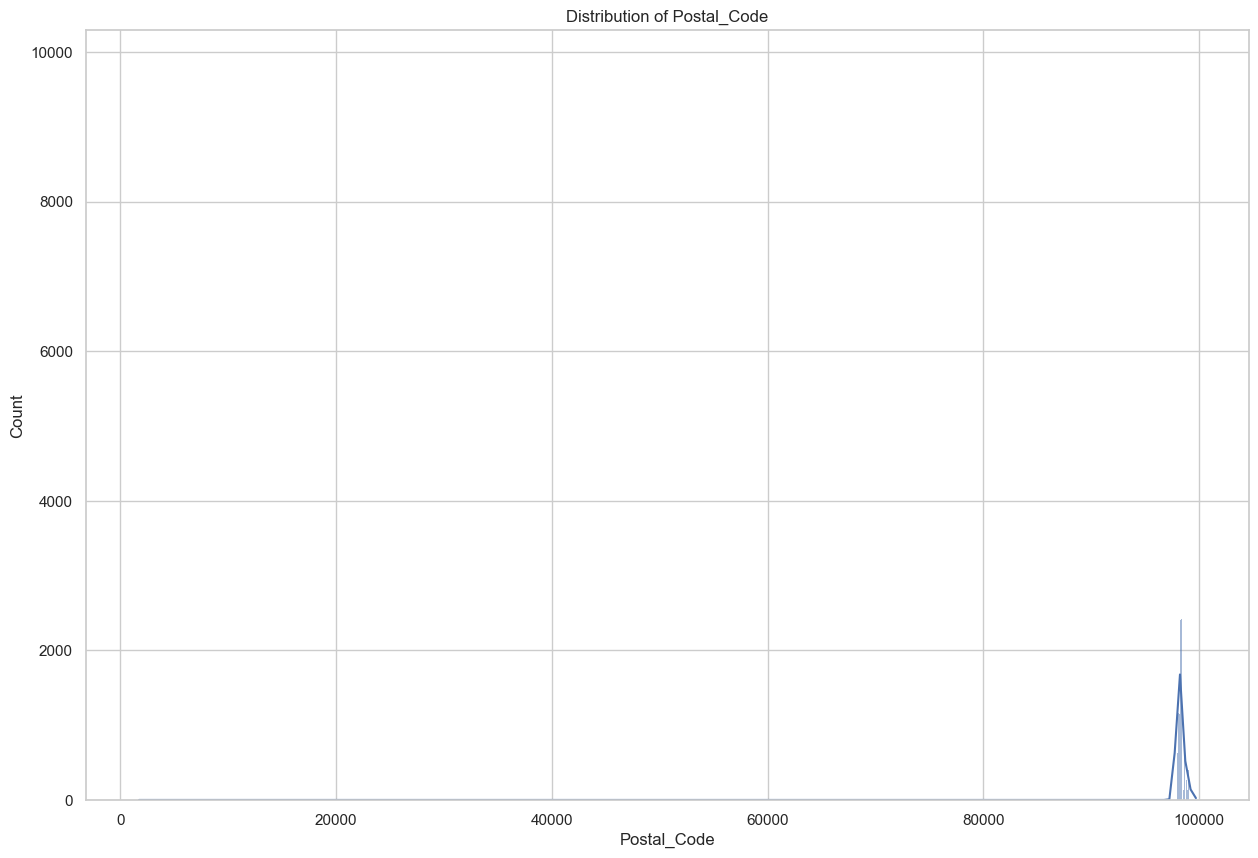

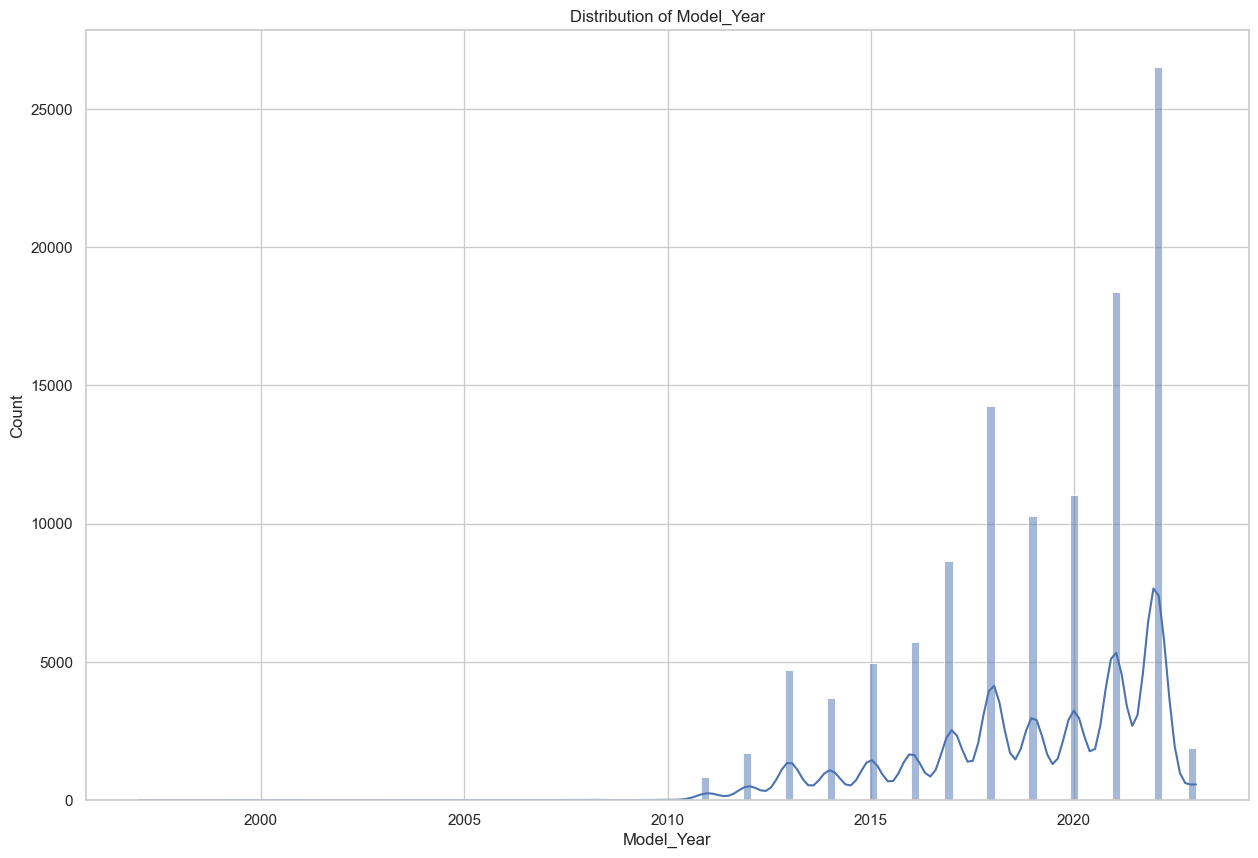

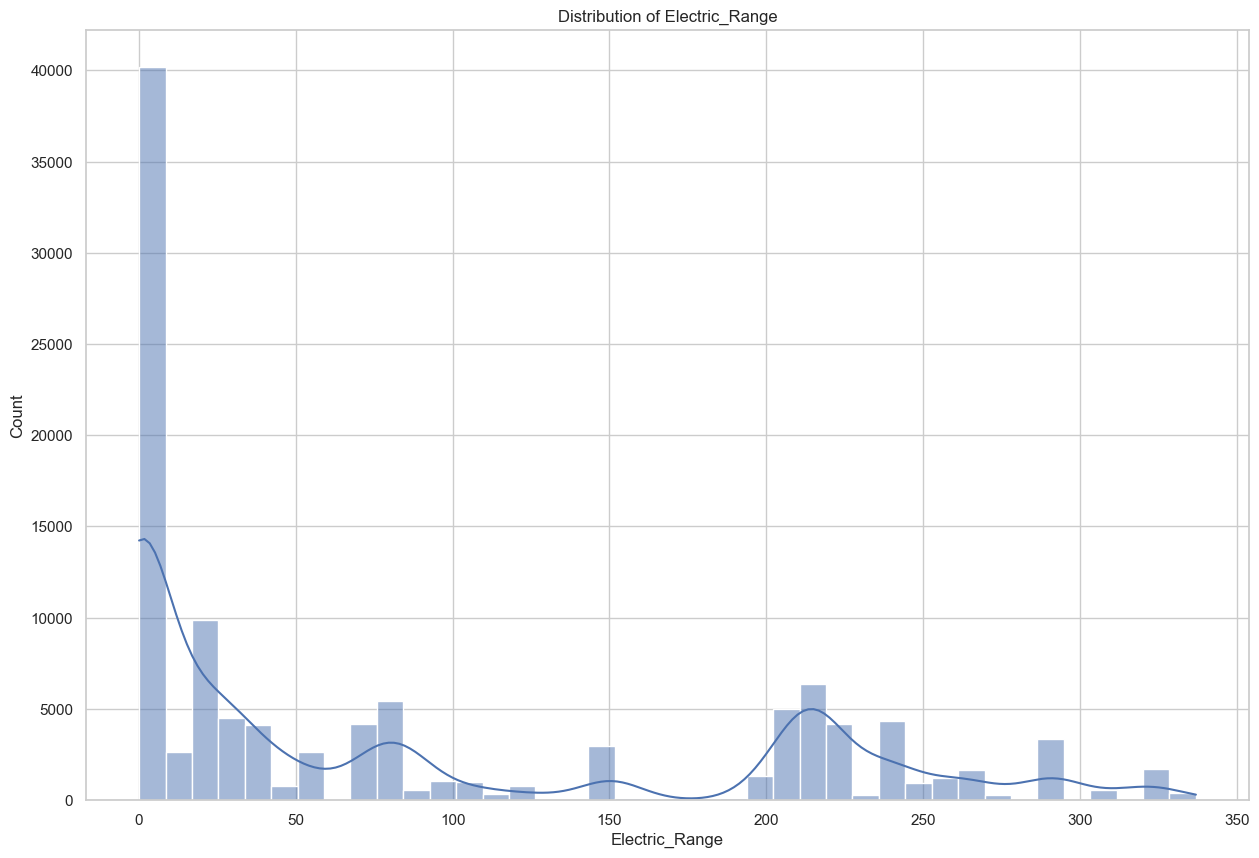

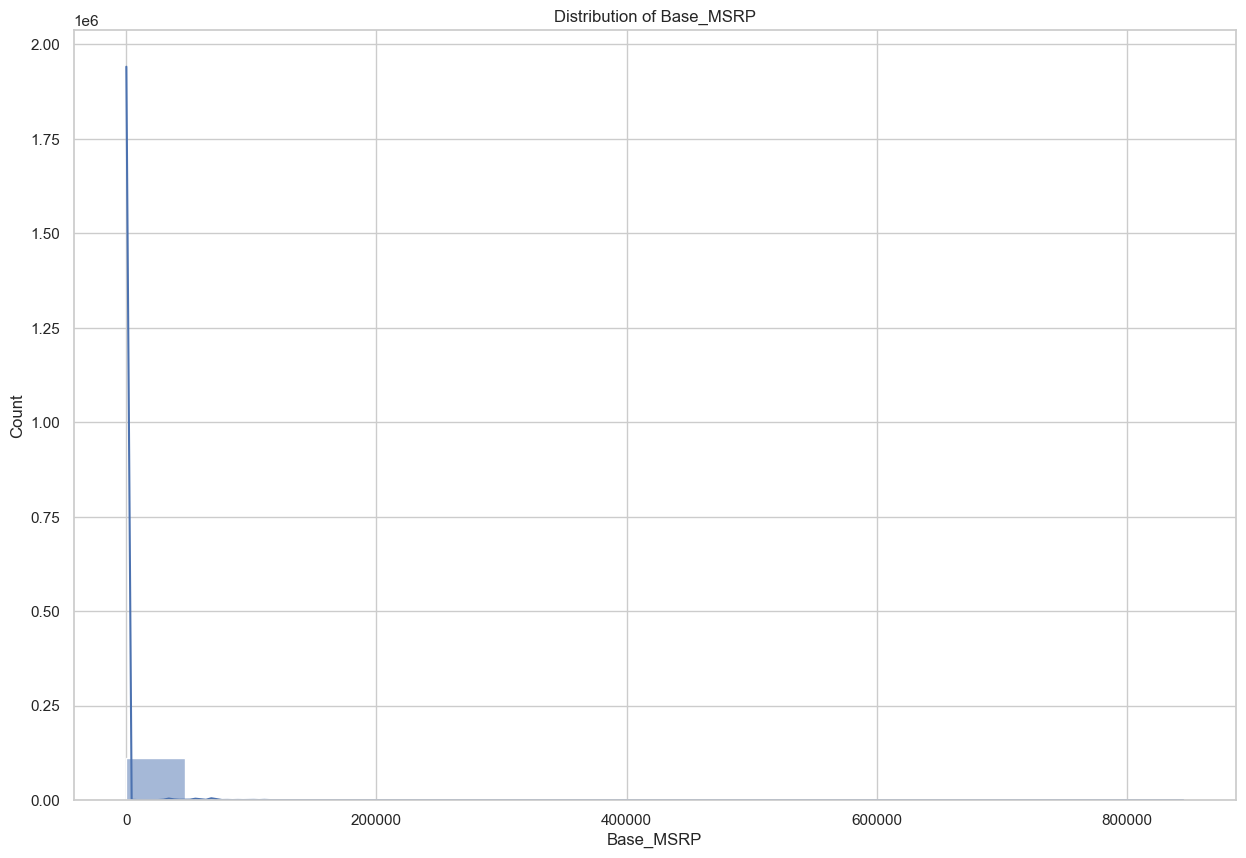

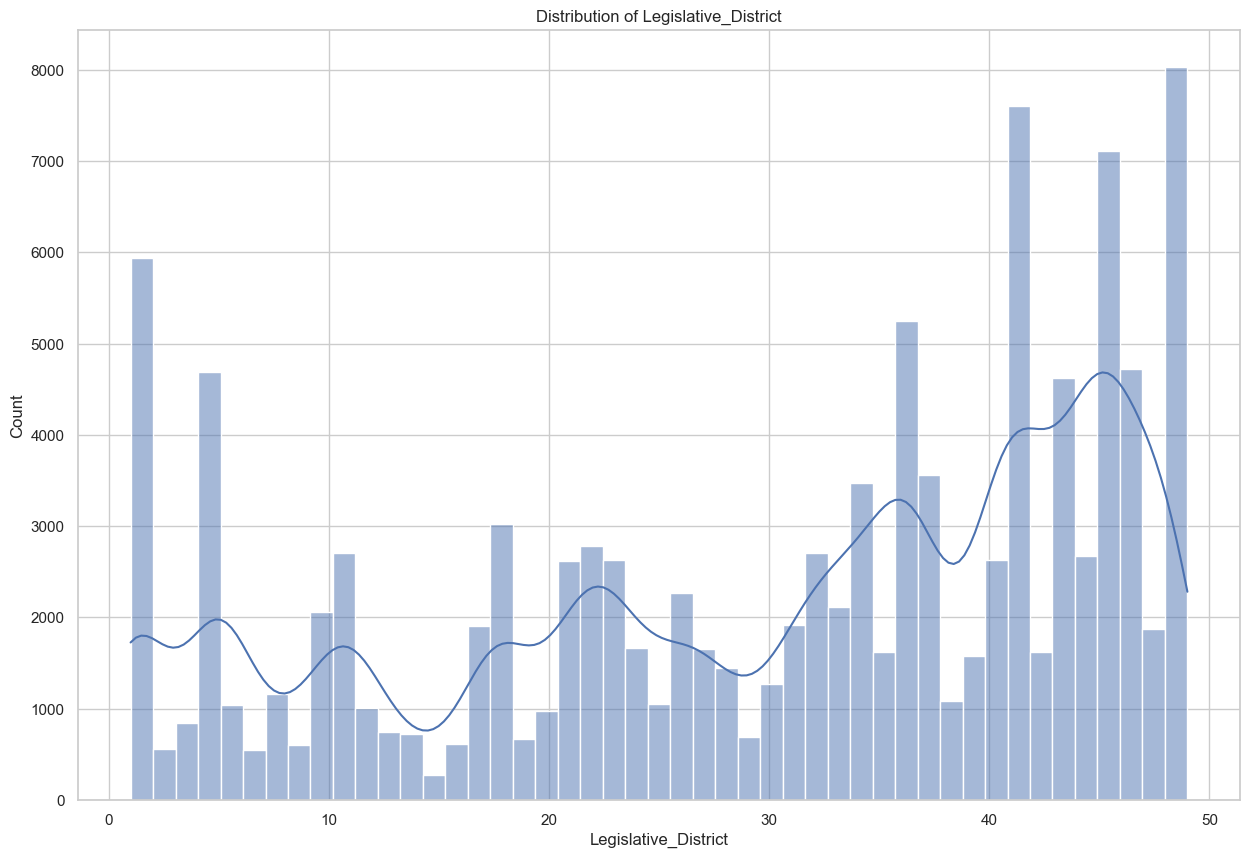

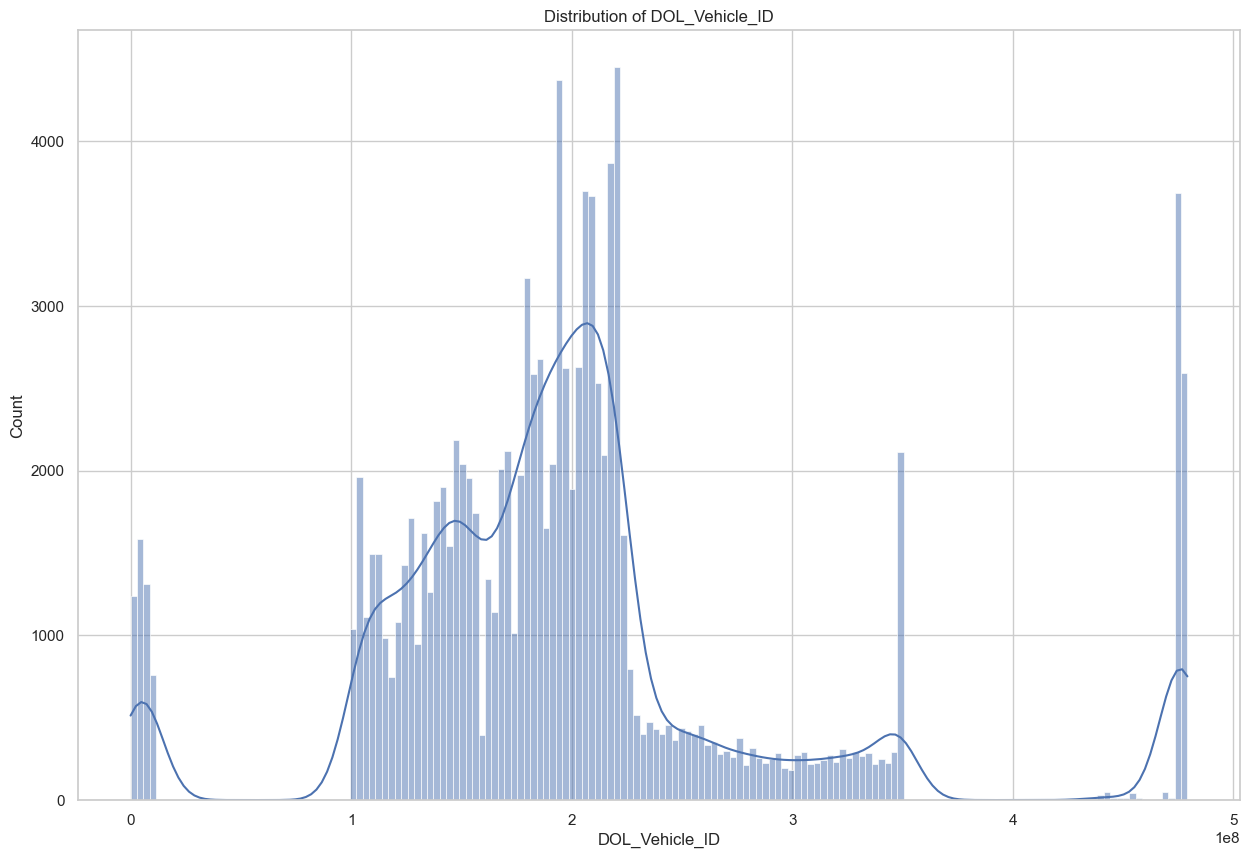

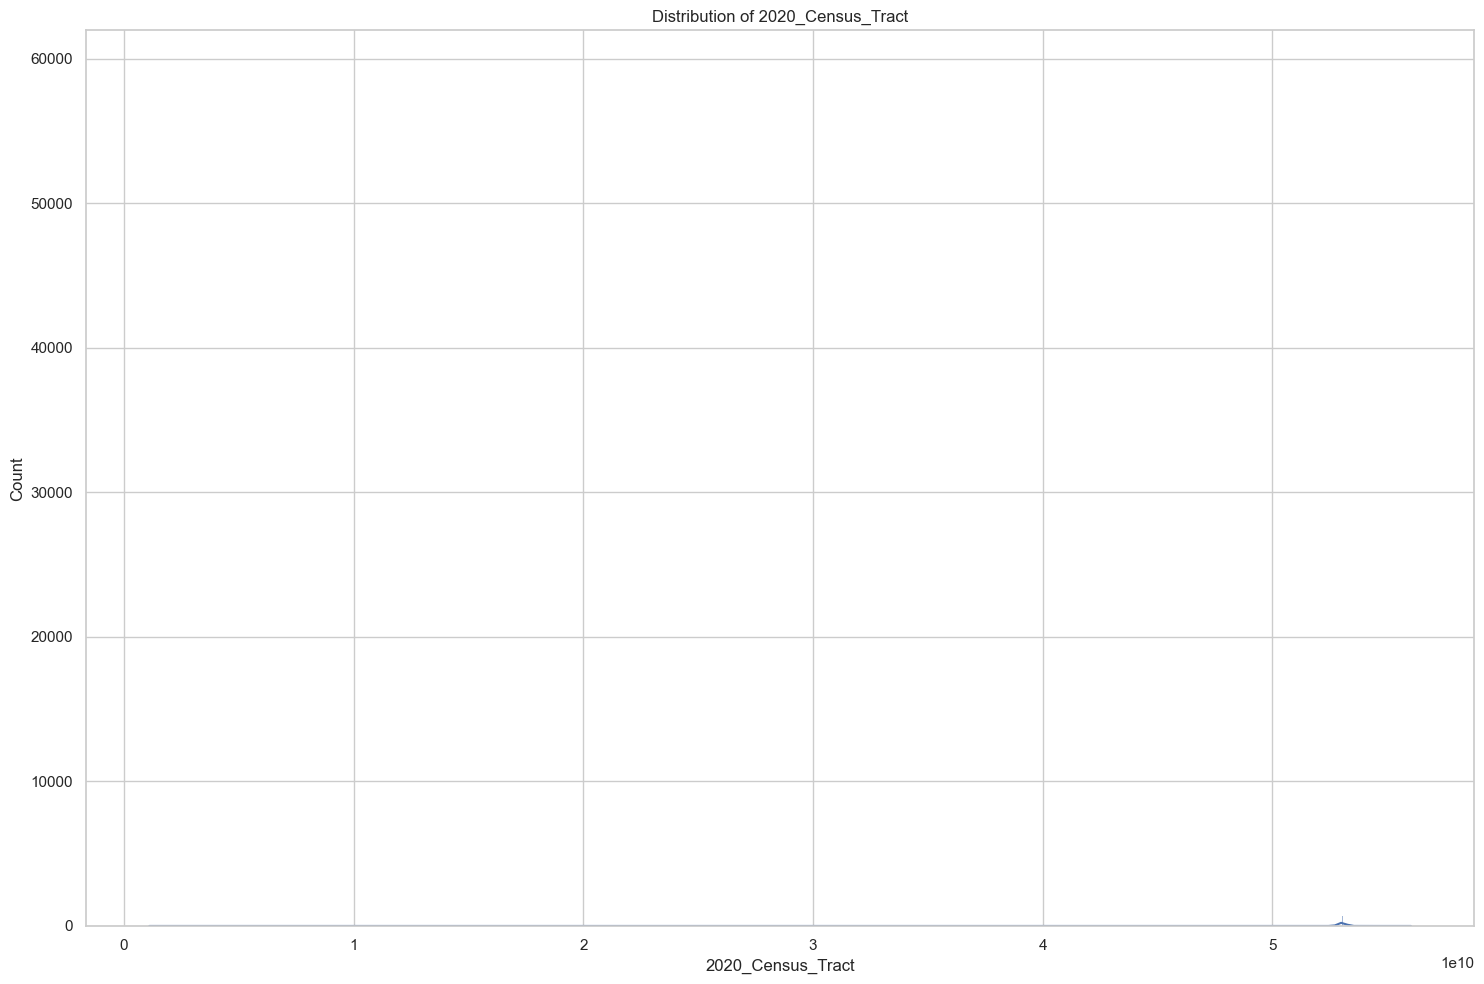

In [84]:

sns.set(style="whitegrid")# Univariate Analysis: Distribution of Numerical Columns

# Plot histograms for numerical columns

for column in numerical_columns:
    plt.figure(figsize=(15, 10))
    
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#### Outlier Detection

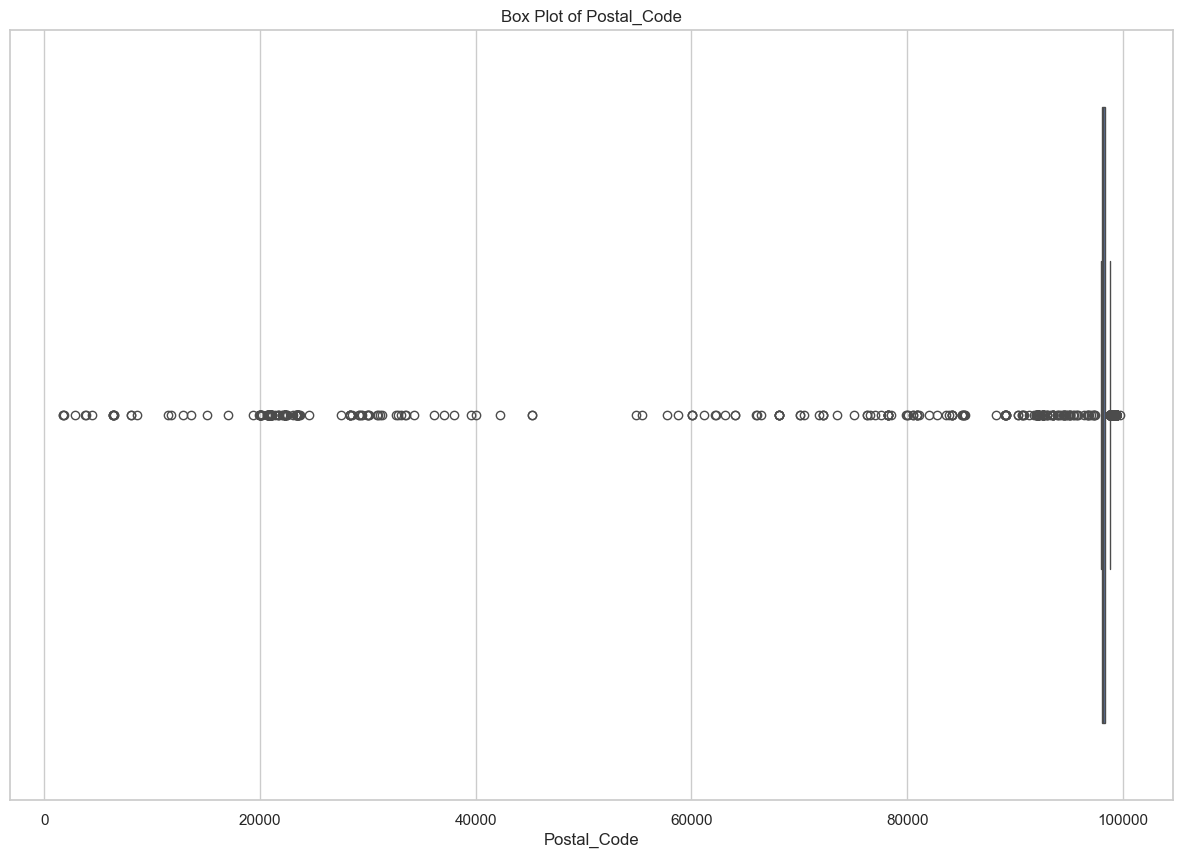

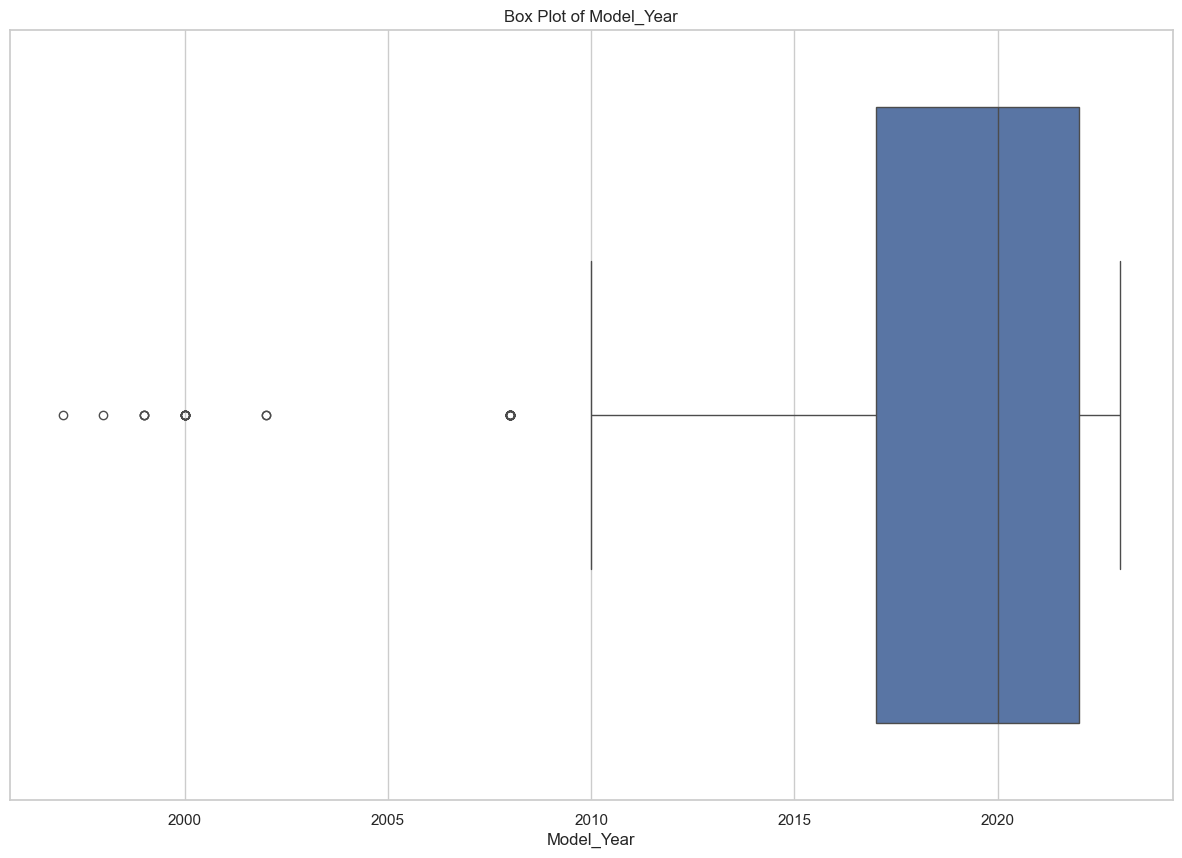

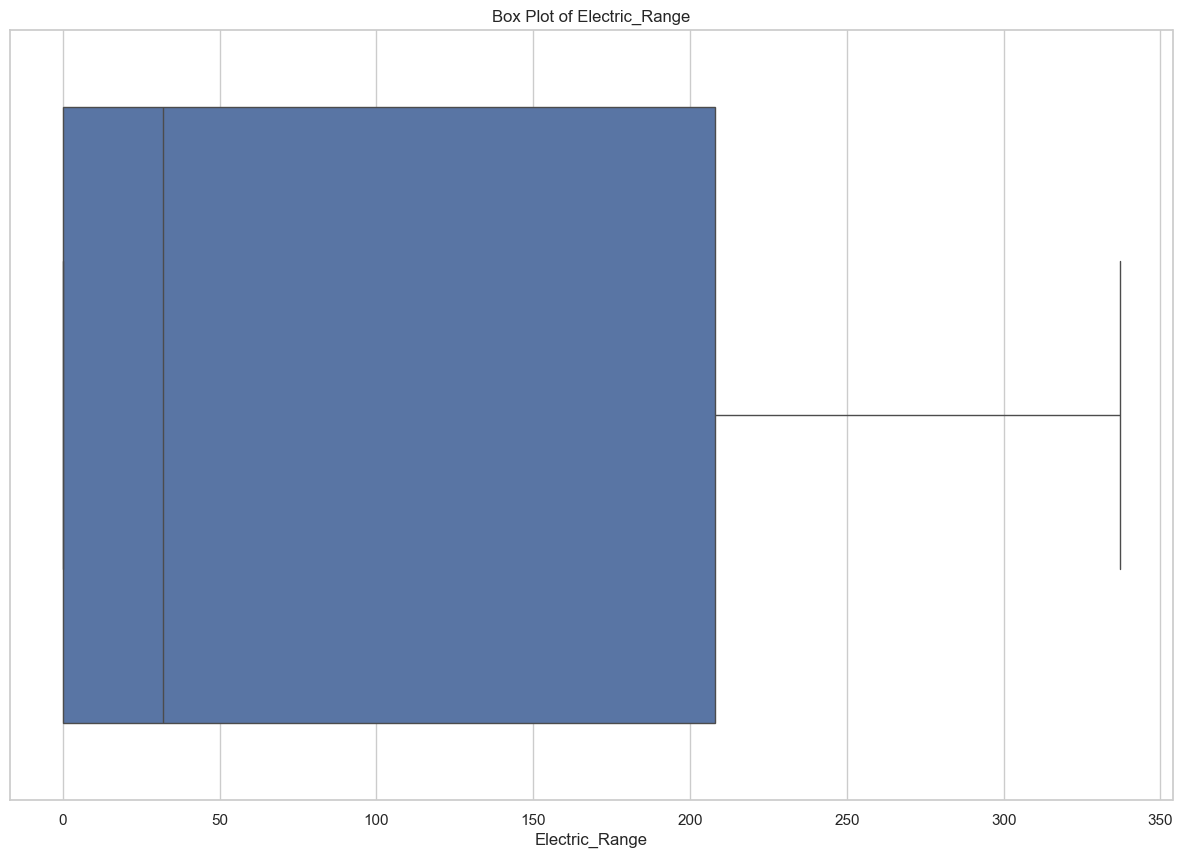

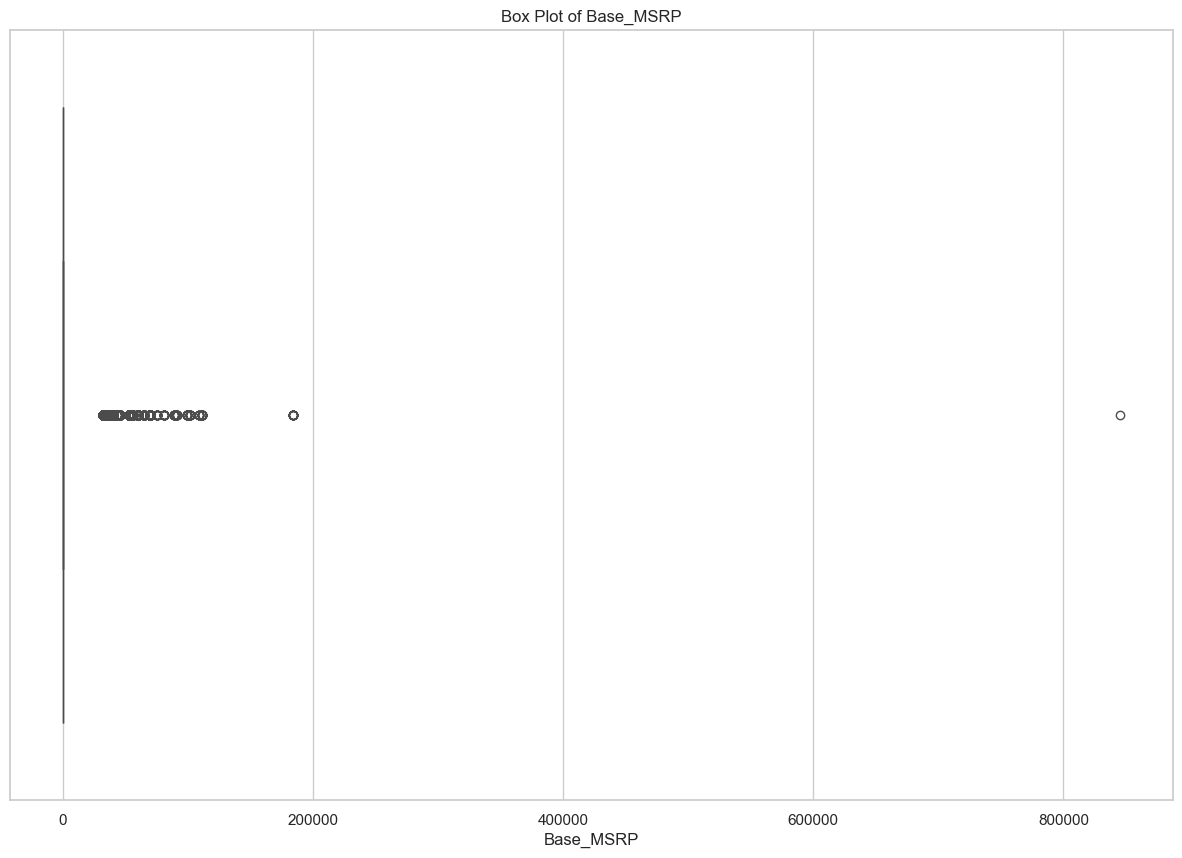

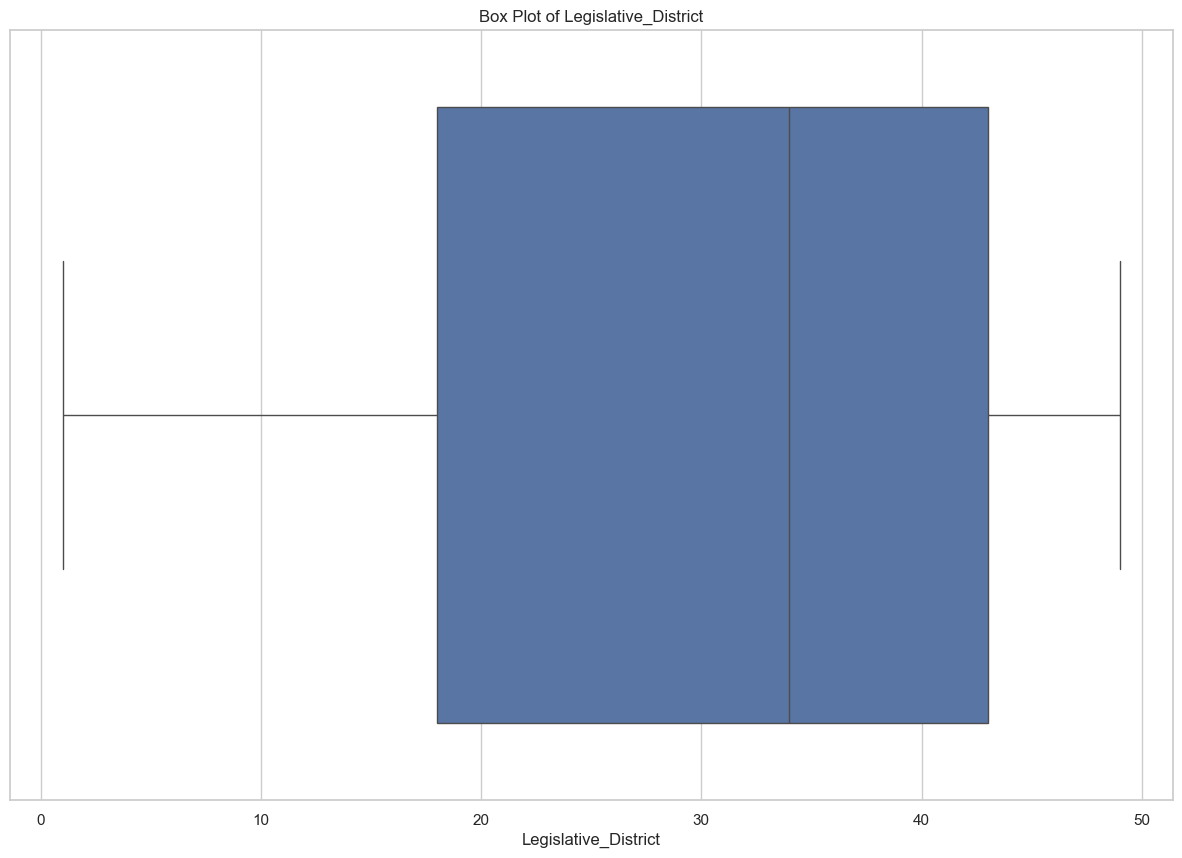

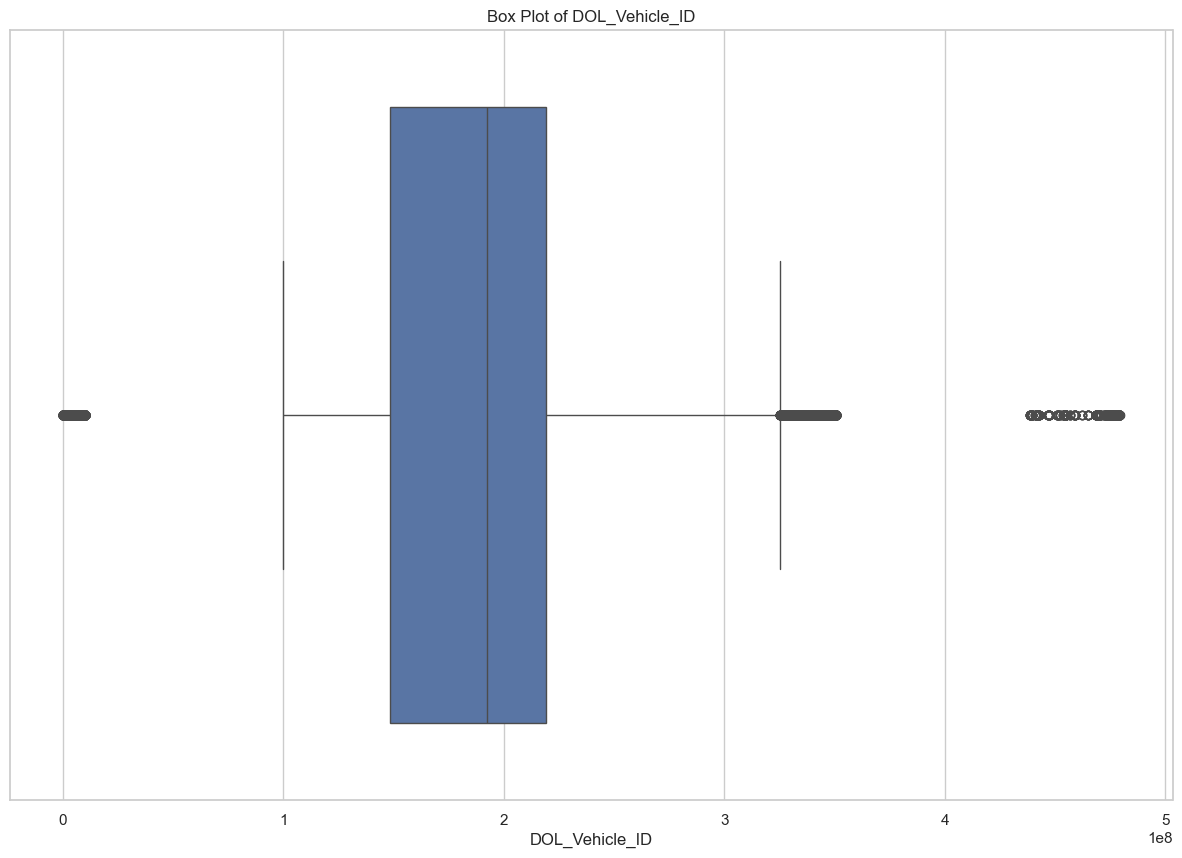

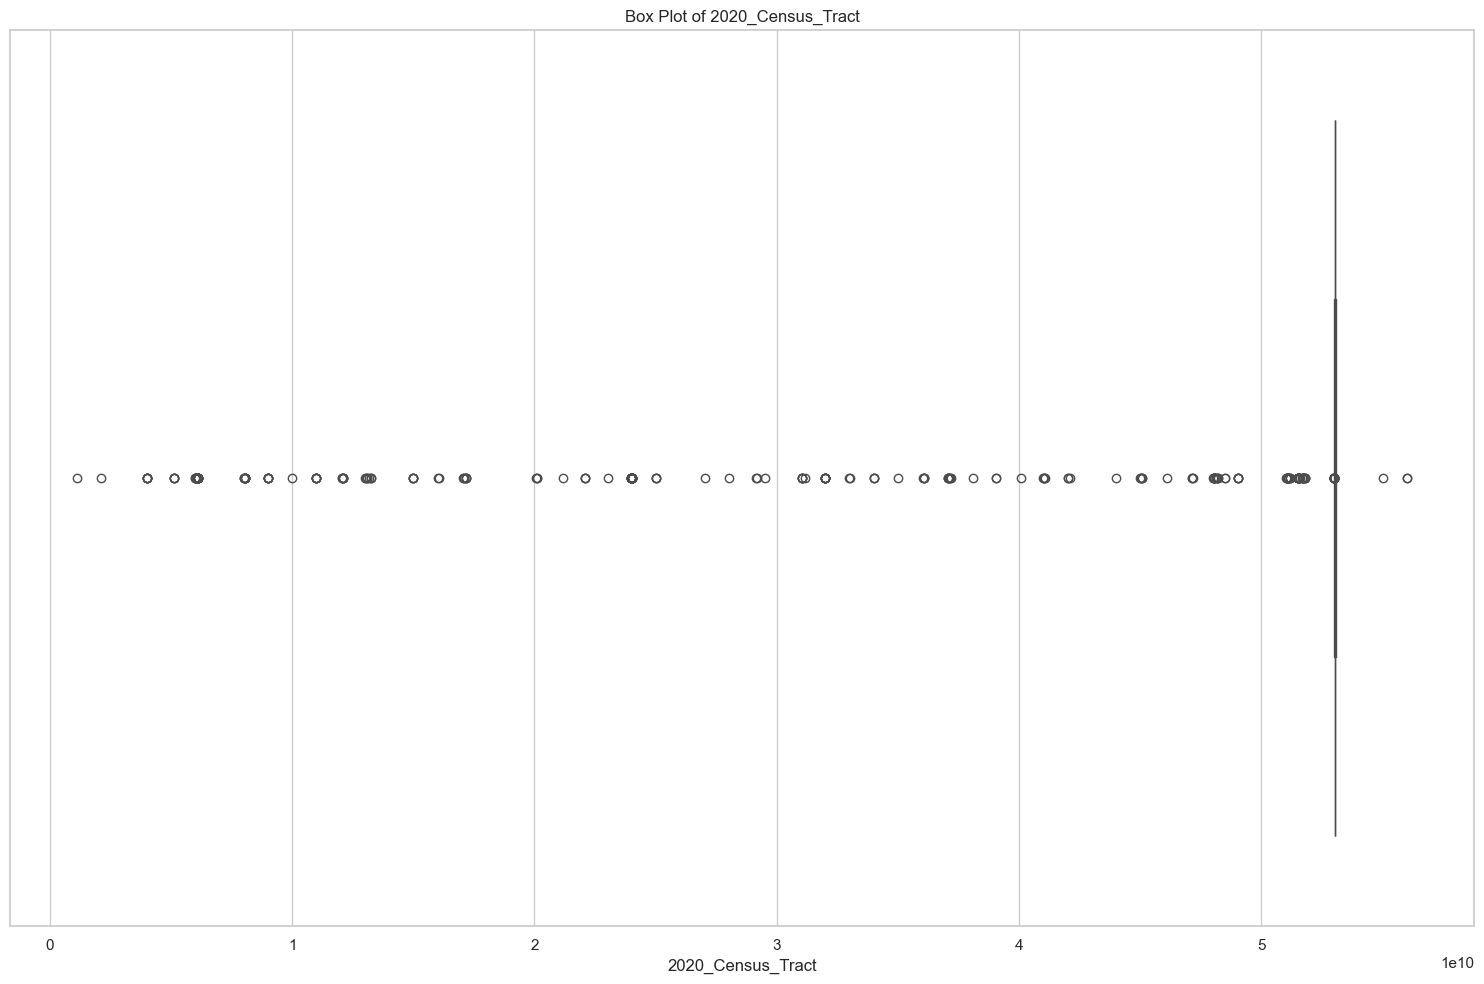

In [86]:
# Box plots for numerical columns

for column in numerical_columns:
    plt.figure(figsize=(15, 10))
    
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [87]:
def describe_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\
Column: {column}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Range of outliers: {outliers[column].min()} to {outliers[column].max()}")
    print(f"Range of non-outliers: {df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].min()} to {df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].max()}")

for column in numerical_columns:
    describe_outliers(df, column)

Column: Postal_Code
Number of outliers: 6858
Percentage of outliers: 6.09%
Range of outliers: 1730 to 99701
Range of non-outliers: 98001 to 98847
Column: Model_Year
Number of outliers: 40
Percentage of outliers: 0.04%
Range of outliers: 1997 to 2008
Range of non-outliers: 2010 to 2023
Column: Electric_Range
Number of outliers: 0
Percentage of outliers: 0.00%
Range of outliers: nan to nan
Range of non-outliers: 0 to 337
Column: Base_MSRP
Number of outliers: 3512
Percentage of outliers: 3.12%
Range of outliers: 31950 to 845000
Range of non-outliers: 0 to 0
Column: Legislative_District
Number of outliers: 0
Percentage of outliers: 0.00%
Range of outliers: nan to nan
Range of non-outliers: 1.0 to 49.0
Column: DOL_Vehicle_ID
Number of outliers: 15538
Percentage of outliers: 13.80%
Range of outliers: 4777 to 479254772
Range of non-outliers: 100021575 to 325351799
Column: 2020_Census_Tract
Number of outliers: 320
Percentage of outliers: 0.28%
Range of outliers: 1101001400 to 56033000100
Range

### Visual Univariate Analysis on Categorical Variables

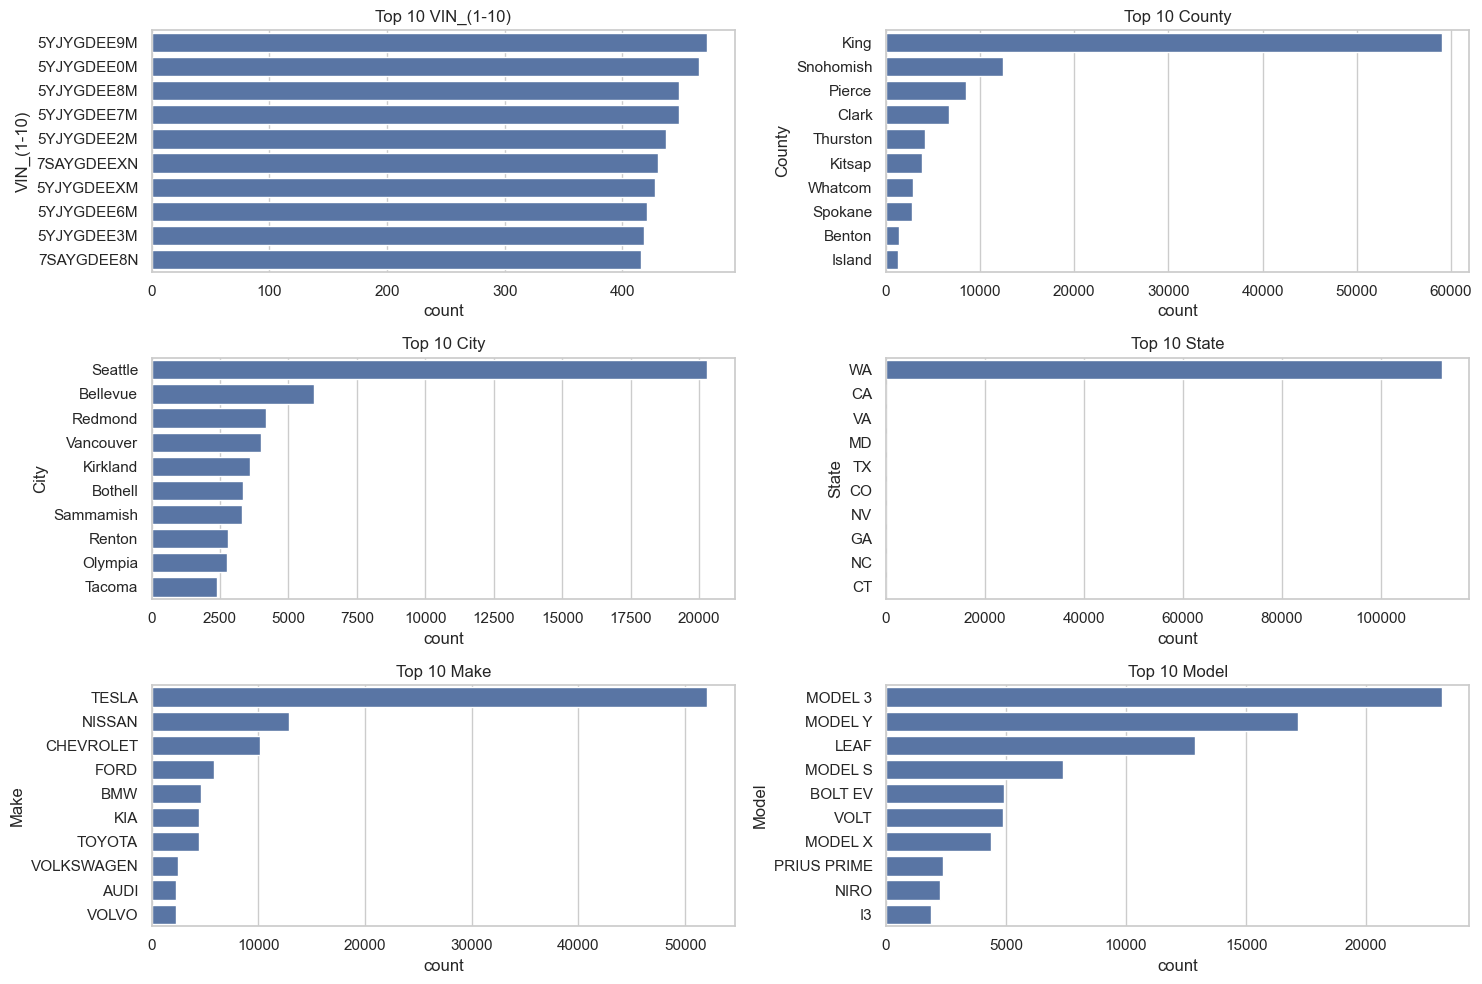

In [89]:
# Plot bar charts for categorical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns[:6], 1):  # Limiting to first 6 for clarity
    plt.subplot(3, 2, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index[:10])
    plt.title(f'Top 10 {column}')
plt.tight_layout()
plt.show()

### Bivariate Analysis

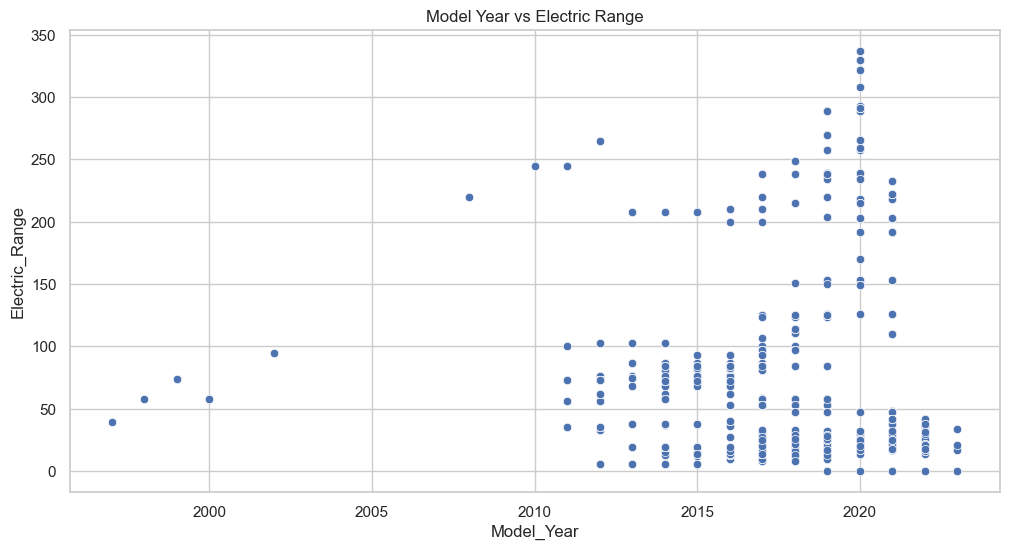

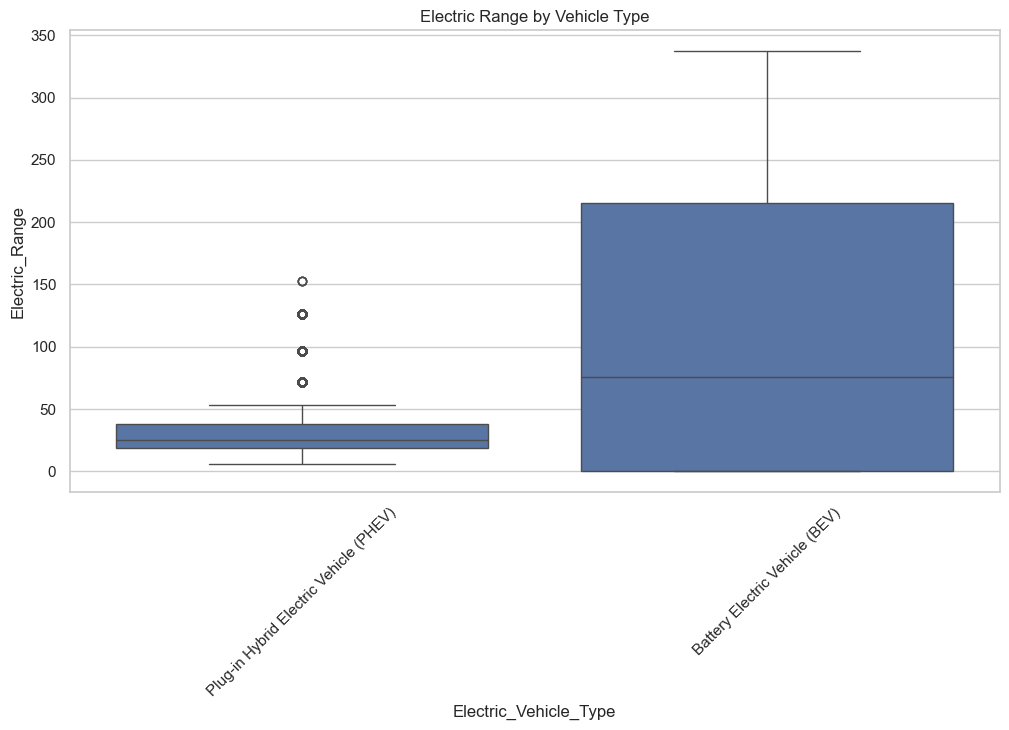

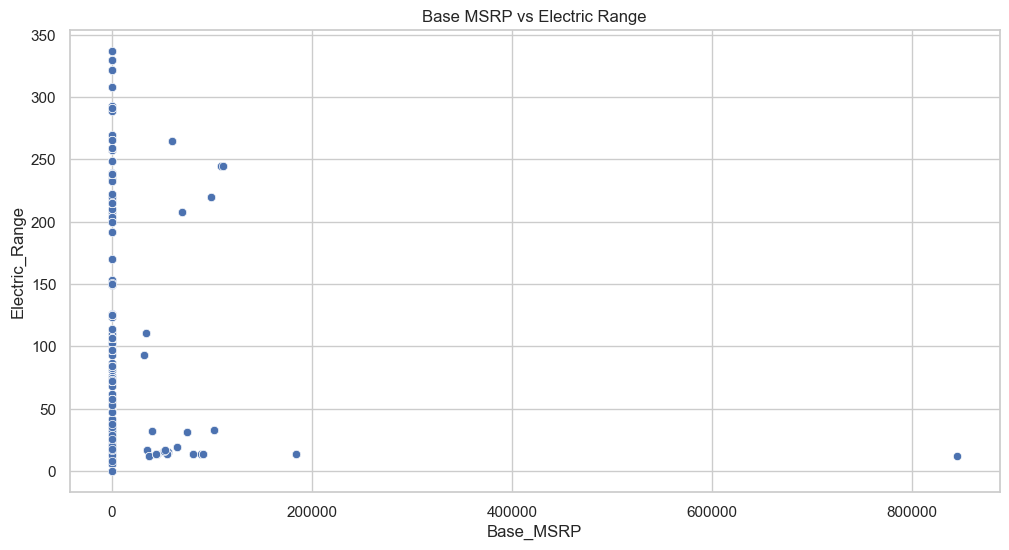

<Figure size 1500x800 with 0 Axes>

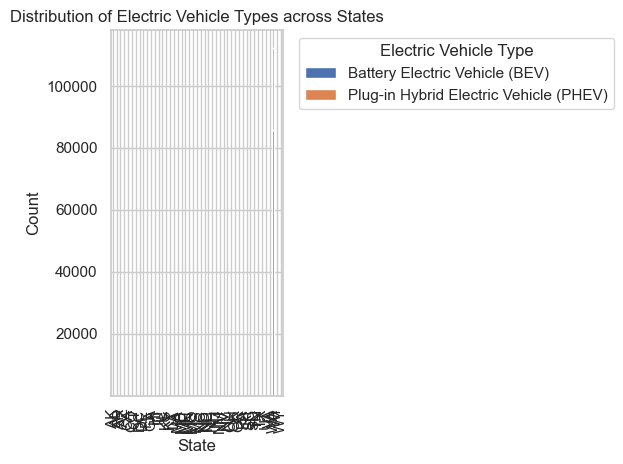

In [91]:

# 1. Relationship between Model Year and Electric Range
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Model_Year', y='Electric_Range', data=df)
plt.title('Model Year vs Electric Range')
plt.show()

# 2. Comparison of Electric Range across different Electric Vehicle Types
plt.figure(figsize=(12, 6))
sns.boxplot(x='Electric_Vehicle_Type', y='Electric_Range', data=df)
plt.title('Electric Range by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

# 3. Correlation between Electric Range and Base MSRP
# First, let's check if Base MSRP has non-zero values
if df['Base_MSRP'].sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Base_MSRP', y='Electric_Range', data=df)
    plt.title('Base MSRP vs Electric Range')
    plt.show()
else:
    print("Base MSRP column contains only zero values. Skipping this analysis.")

# 4. Distribution of Electric Vehicle Types across different States
vehicle_type_by_state = df.groupby('State')['Electric_Vehicle_Type'].value_counts().unstack()
plt.figure(figsize=(15, 8))
vehicle_type_by_state.plot(kind='bar', stacked=True)
plt.title('Distribution of Electric Vehicle Types across States')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [92]:

# 5. Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6. Distribution of Electric Vehicle Types by Make
plt.figure(figsize=(14, 7))
sns.countplot(y='Make', hue='Electric_Vehicle_Type', data=df, order=df['Make'].value_counts().index)
plt.title('Distribution of Electric Vehicle Types by Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.legend(title='Electric Vehicle Type')
plt.show()


ValueError: could not convert string to float: 'JTMEB3FV6N'

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Assuming 'df' is your DataFrame
df.boxplot(by="CAFV_Eligibility", column=['Electric_Range'])

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location

In [ ]:
! pip install plotly

In [ ]:

import plotly.express as px

In [ ]:
ev_count_by_state = df.groupby('State').size().reset_index(name='Number_of_EV_Vehicles')
ev_count_by_state


In [ ]:
# Count the number of EVs per state
ev_count_by_state = df['State'].value_counts().reset_index()
ev_count_by_state.columns = ['State', 'EV_Count']

# Create the Choropleth map
fig = px.choropleth(ev_count_by_state,
                    locations='State', 
                    locationmode="USA-states", 
                    color='EV_Count',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Number of Electric Vehicles by State")

# Update the layout
fig.update_layout(
    title_x=0.5,
    geo_scope='usa',
)

fig.show()

# Save the plot as an HTML file
fig.write_html("ev_choropleth_map.html")

print("Choropleth map has been created and saved as 'ev_choropleth_map.html'.")
print("\
Top 5 states by EV count:")
print(ev_count_by_state.head().to_string(index=False))

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('dataset.csv', encoding='ascii')

# Count the number of EVs per postal code
ev_count_by_postal = df['Postal Code'].value_counts().reset_index()
ev_count_by_postal.columns = ['Postal Code', 'EV_Count']

# Merge the count with the original dataframe to get location data
df_merged = df.merge(ev_count_by_postal, on='Postal Code')

# Extract latitude and longitude from the 'Vehicle Location' column
df_merged['Longitude'] = df_merged['Vehicle Location'].str.extract('POINT \(([-\d.]+) ')
df_merged['Latitude'] = df_merged['Vehicle Location'].str.extract(' ([-\d.]+)\)')

# Convert to numeric
df_merged['Longitude'] = pd.to_numeric(df_merged['Longitude'])
df_merged['Latitude'] = pd.to_numeric(df_merged['Latitude'])

# Create the scatter plot on a map
fig = px.scatter_mapbox(df_merged, 
                        lat='Latitude', 
                        lon='Longitude', 
                        color='EV_Count',
                        size='EV_Count',
                        hover_name='Postal Code',
                        hover_data=['City', 'State', 'EV_Count'],
                        color_continuous_scale="Viridis",
                        size_max=15,
                        zoom=3,
                        title="Number of Electric Vehicles by Postal Code")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Save the plot as an HTML file
fig.write_html("ev_postal_code_map.html")

fig.show()

print("Scatter map based on postal codes has been created and saved as 'ev_postal_code_map.html'.")
print("\
Top 10 postal codes by EV count:")
print(ev_count_by_postal.head(10).to_string(index=False))

# Display some statistics
print("\
Total number of unique postal codes:", len(ev_count_by_postal))
print("Average number of EVs per postal code:", round(ev_count_by_postal['EV_Count'].mean(), 2))
print("Median number of EVs per postal code:", ev_count_by_postal['EV_Count'].median())
print("Maximum number of EVs in a single postal code:", ev_count_by_postal['EV_Count'].max())

## Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [ ]:
!pip install bar-chart-race

In [ ]:

import bar_chart_race as bcr
import warnings

In [ ]:
# Convert 'Model Year' to string for grouping
df['Model Year'] = df['Model Year'].astype(str)

# Group the data by 'Model Year' and 'Make', then count the occurrences
grouped_data = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Pivot the data to have 'Model Year' as the index and 'Make' as columns
pivoted_data = grouped_data.pivot(index='Model Year', columns='Make', values='Count')

# Fill missing values with 0 (for years where some makes might have no entries)
pivoted_data = pivoted_data.fillna(0)

# Create the bar chart race animation and save it as a GIF
bcr.bar_chart_race(df=pivoted_data, filename='EV_racing_bar_plot.gif',
                   orientation='h', sort='desc', n_bars=10,
                   title='EV Make Count Over the Years', filter_column_colors=True, period_length=1000)

